# Task Details:
With the help of this particular data set you have to build ***a recommended engine***. And your recommended engine will return maximum 10 movies name if an user search for a particular movie.


Recommended engine generally in three types <br>
***1.content Based recommended engine*** <br>
2.collaborative recommender engine <br>
3.hybrid recommended engine
<hr>

# Goal Details:
Recommended engine must return 5 movie names and maximum it can return 10 movie names if an user search for a particular movie. This recommender engine should not give suggestion in between 1 to 4 and 6 to 10 it have to return 5 movie names for 10 movie names.
<hr>

# Data source
https://www.kaggle.com/shivamb/netflix-shows

<hr>

# What is content based recommended engine?

Content based recommended engine displays a list of items with similar features. 

Notice that ***No user-information is required to this system.***




<hr>
The script below is created by Taishi Nammoto


<hr>



# Parse data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/netflix_titles.csv')
df.head(3) 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [3]:
df.shape

(7787, 12)

In [4]:
# Find unique values
for column in df.columns:
    n = df[column].nunique()
    print(f'{column} has {n} unique values')

show_id has 7787 unique values
type has 2 unique values
title has 7787 unique values
director has 4049 unique values
cast has 6831 unique values
country has 681 unique values
date_added has 1565 unique values
release_year has 73 unique values
rating has 14 unique values
duration has 216 unique values
listed_in has 492 unique values
description has 7769 unique values


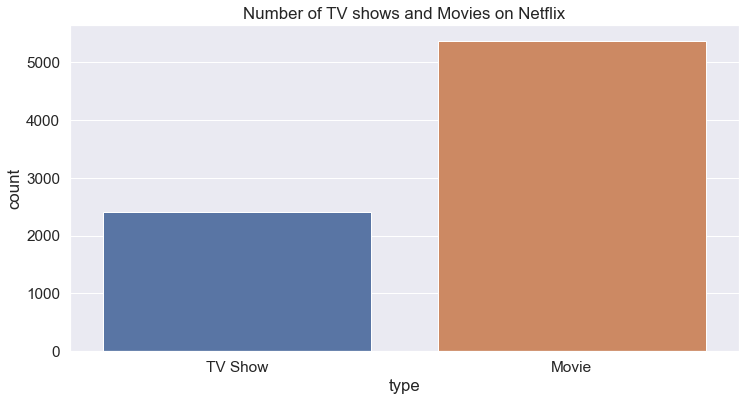

In [5]:
# compare number of TV shows with movies
sns.set_theme()
sns.set_context("notebook", font_scale=1.4)
plt.figure(figsize=(12,6))
sns.countplot(x='type', data=df)
plt.title('Number of TV shows and Movies on Netflix')
plt.show()

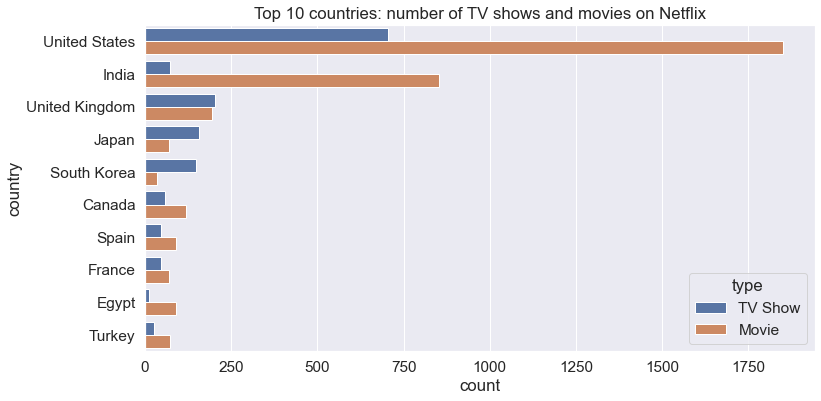

In [6]:
# Top 10 countries: number of TV shows and movies on Netflix
sns.set_context("notebook", font_scale=1.4)
plt.figure(figsize=(12,6))
sns.countplot(y='country', data=df, hue='type',order=df['country'].value_counts().iloc[:10].index)
plt.title('Top 10 countries: number of TV shows and movies on Netflix')
plt.show()

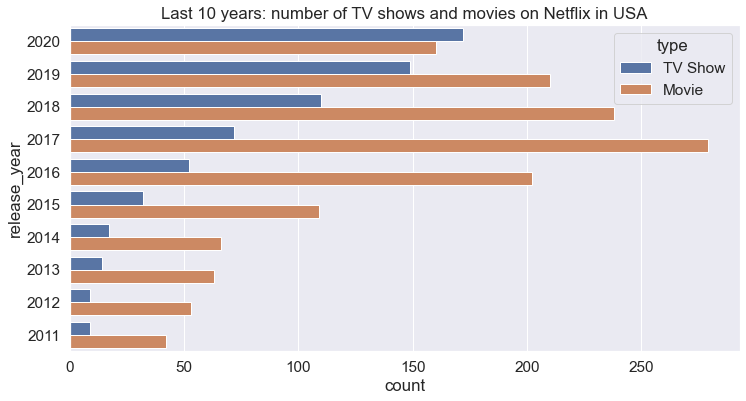

In [7]:
# Last 10 years: number of TV shows and movies on Netflix in USA
sns.set_context("notebook", font_scale=1.4)
plt.figure(figsize=(12,6))
order = df['release_year'].sort_values(ascending=False).unique()[1:11]
data = df.loc[df['country']=='United States']
sns.countplot(y='release_year', data=data, hue='type', order=order, hue_order=['TV Show','Movie'])
plt.title('Last 10 years: number of TV shows and movies on Netflix in USA')
plt.show()

In [8]:
# Percent of missing data
df.isna().sum()*100/len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [9]:
# Detele irrelevant columns
irrelevants = ['show_id', 'type', 'director', 'cast', 'date_added', 'country', 'release_year', 'rating', 'duration']
df_clean = df.drop(irrelevants, axis=1)

# Num of missing data
df_clean.isna().sum()

title          0
listed_in      0
description    0
dtype: int64

In [10]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

list_sw = set(stopwords.words('english') + list(punctuation))

for column in ['listed_in', 'description']:
    
    # Lower case for text columns
    df_clean[column] = df_clean[column].str.lower()
    
    # Tokenize
    df_clean[column] = df_clean[column].apply(word_tokenize)
    
    # Stop words
    df_clean[column] = df_clean[column].apply(lambda x: [word for word in x if word not in list_sw])
    
    # Remove punctuation
    df_clean[column] = df_clean[column].apply(lambda x: [word.translate(str.maketrans('', '', punctuation)) for word in x])
    
    # Remove duplicated words
    df_clean[column] = df_clean[column].apply(lambda x: list(set(x)))
    
    # Remove one word (noise)
    df_clean[column] = df_clean[column].apply(lambda x: [word for word in x if len(word) > 1])

df_clean.head(3)

,title,listed_in,description
0,3%,"[fantasy, shows, international, tv, dramas, sc...","[crowded, saved, get, far, chance, one, slums,..."
1,7:19,"[dramas, movies, international]","[rescued, hits, desperately, life, trapped, tr..."
2,23:59,"[international, movies, horror]","[army, terrifying, confront, training, fellow,..."


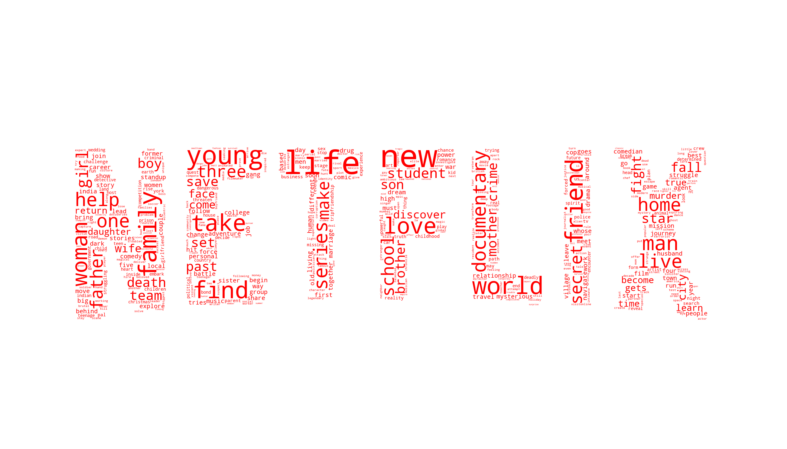

In [11]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text=''
for i in range(len(df_clean)):
    content = ' '.join(df_clean['description'].iloc[i])
    text += content

mask = np.array(Image.open('Data/netflix_logo.jpg'))

wc = WordCloud(background_color="white", mask=mask, max_words=500, 
               stopwords=STOPWORDS, width=4000, height=2000, 
               color_func=lambda *args, **kwargs: 'red').generate(text) # contour_width=2, contour_color='red'

plt.figure(figsize=(16,8))
# image_colors = ImageColorGenerator(mask) 
# plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear', aspect="equal")
plt.imshow(wc, interpolation='bilinear', aspect='equal')
plt.axis('off')
plt.show()
wc.to_file('Data/wordcloud.png')

# Content Based Recommended engine
Step 1. Download pretrained Google word2vec model <br>
Step 2. Load the trained model<br>
Step 3. Find similarity of the selected movie and the other movies<br>
Step 4. Display a list of relevant movies<br>

# Step 1. Download pretrained Google word2vec model

In [12]:
import gensim.downloader as api

# Download pretrained Google word2vec model
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

/Users/taishinammoto/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


# Step 2. Load the trained model

In [13]:
import gensim

# Load the trained data 
model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)

# Select only trained words so that the model can interpret words as vectors
for column in ['listed_in', 'description']:
    df_clean[column] = df_clean[column].apply(lambda x: [word for word in x if word in model.vocab])

# Step 3. Find similarity of the selected movie and the other movies

In [14]:
# Recommend engine
def recommend(title):
    df_selected = df_clean[df_clean['title']==title]
    
    score_dict = {}
    score_dict['listed_in'] = []
    score_dict['description'] = []
    for i in range(len(df_clean)):
        # evaluate the similarity with Google's trained model
        listed_in = model.n_similarity(df_clean['listed_in'].iloc[i], df_selected['listed_in'].iloc[0])
        description = model.n_similarity(df_clean['description'].iloc[i], df_selected['description'].iloc[0])
        score_dict['listed_in'].append(listed_in)
        score_dict['description'].append(description)
        
    df_score = df_clean.copy()
    df_score['score: listed_in'] = score_dict['listed_in']
    df_score['score: description'] = score_dict['description']
    df_score['total score'] = df_score['score: listed_in'] + df_score['score: description']
    df_score = df_score.sort_values(['total score'], ascending=False)
    
    return df_score.iloc[1:11]

# Step 4. Display a list of relevant movies

In [15]:
# Select a random movie
sample = df_clean.sample()
sample

,title,listed_in,description
3705,Lola Igna,"[comedies, movies, international]","[life, woman, disrupted, realize, chance, vill..."


In [16]:
# Get the title of sample 
sample_title = sample['title'].item()

# List relevant titles based on the category and descriptoin 
recommend(sample_title)

,title,listed_in,description,score: listed_in,score: description,total score
1324,Chicken Kokkachi,"[comedies, movies, international]","[marriage, man, learns, said, wake, supporting...",1.000000,0.735539,1.735539
885,Bhaji In Problem,"[comedies, movies, international]","[two, unaware, knows, man, arrives, life, old,...",1.000000,0.735079,1.735079
2155,Fifty Year Old Teenager,"[comedies, movies, international]","[life, younger, woman, married, act, falls, li...",1.000000,0.699812,1.699812
3460,Kuch Kuch Hota Hai,"[comedies, movies, dramas, international]","[girl, best, woman, wish, mother, sets, father...",0.958004,0.741664,1.699668
7532,Well Done Abba,"[comedies, movies, international]","[mired, bureaucracy, village, leave, husband, ...",1.000000,0.686940,1.686940
102,3 Türken & ein Baby,"[comedies, movies, international]","[lives, exgirlfriend, three, care, dissatisfie...",1.000000,0.684217,1.684217
287,About Time,"[comedies, movies, dramas, international]","[travel, learns, lives, go, men, decides, woma...",0.958004,0.724101,1.682105
6942,The Tribe,"[comedies, movies, international]","[sensation, life, memory, mother, biological, ...",1.000000,0.680872,1.680872
4357,My Step Dad: The Hippie,"[comedies, movies, international]","[man, three, stop, take, married, widowed, adu...",1.000000,0.680013,1.680013
7393,Varane Avashyamund,"[comedies, movies, dramas, international]","[complex, marriage, lives, arranged, man, beco...",0.958004,0.718106,1.676110
